In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from pycocotools.coco import COCO
import random
import cv2

In [31]:
# Path to the COCO dataset annotations and images
dataDir = '/media/alberto/Elements/Datasets/COCO/'
dataType = 'val2017'  # or 'val2017' for validation set
annFile = os.path.join(dataDir, 'annotations', 'instances_' + dataType + '.json')
imgDir = os.path.join(dataDir, dataType)
save_path = os.path.join(dataDir, dataType + '_cropped')
os.makedirs(save_path, exist_ok=True)

# Initialize COCO api for instance annotations
coco = COCO(annFile)

loading annotations into memory...
Done (t=0.64s)
creating index...
index created!


In [3]:
min_size = 128

# Get category IDs for 'person' and 'car'
catIds = coco.getCatIds(catNms=['person', 'car'])
imgIds = coco.getImgIds(catIds=catIds)
assert(len(imgIds) == len(set(imgIds)))  # Check for duplicates
print(len(imgIds))

# Filter images with at least one bounding box with 16x16 dimensions for both person and car
car_imgs = {"id": [], "bbox": []}
person_imgs = {"id": [], "bbox": []}
for imgId in imgIds:
    annIds = coco.getAnnIds(imgIds=imgId, catIds=catIds, iscrowd=None)
    anns = coco.loadAnns(annIds)
    for ann in anns:
        bbox = ann['bbox']
        if ann['category_id'] == catIds[0] and bbox[2] >= min_size and bbox[3] >= min_size:  # Person
            person_imgs["id"].append(imgId)
            person_imgs["bbox"].append(bbox)
        elif ann['category_id'] == catIds[1] and bbox[2] >= min_size and bbox[3] >= min_size:  # Car
            car_imgs["id"].append(imgId)
            car_imgs["bbox"].append(bbox)

print("Number of people images: ", len(person_imgs["id"]))
print("Number of car images: ", len(car_imgs["id"]))

359
Number of people images:  156
Number of car images:  70


(152, 128, 3)


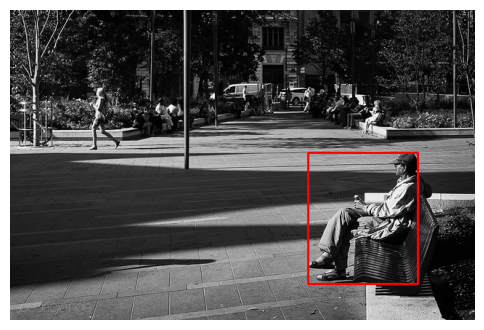

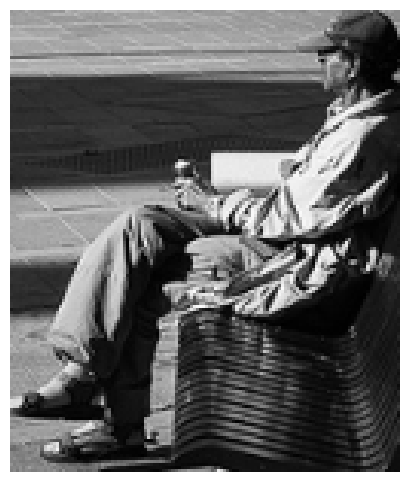

In [4]:
# Select one random sample from the filtered images
id = random.randint(0, len(person_imgs['id']) - 1)
random_img = person_imgs['id'][id]
random_img_bbox = person_imgs['bbox'][id]

# Load and display the image with bounding boxes
img_info = coco.loadImgs(random_img)[0]
img_path = os.path.join(imgDir, img_info['file_name'])
image = cv2.imread(img_path)
plt1, ax1 = plt.subplots(1, 1, figsize=(6, 6))
x, y, w, h = random_img_bbox
bb_img = cv2.rectangle(image.copy(), (int(x), int(y)), (int(x + w), int(y + h)), (0, 0, 255), 2)
ax1.imshow(cv2.cvtColor(bb_img, cv2.COLOR_BGR2RGB))
ax1.axis('off')

plt2, ax2 = plt.subplots(1, 1, figsize=(6, 6))
sub_img = image[int(y):int(y + h), int(x):int(x + w)]
sub_img = cv2.resize(sub_img, (min_size, (min_size * sub_img.shape[0]) // sub_img.shape[1]))
ax2.imshow(cv2.cvtColor(sub_img, cv2.COLOR_BGR2RGB))
ax2.axis('off')
print(sub_img.shape)


(245, 128, 3)


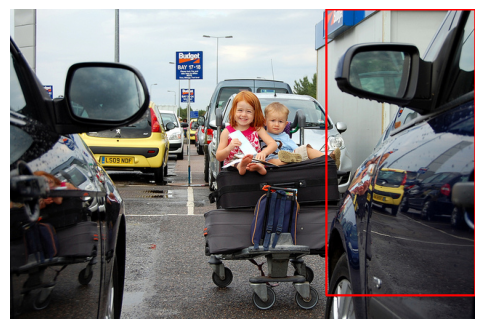

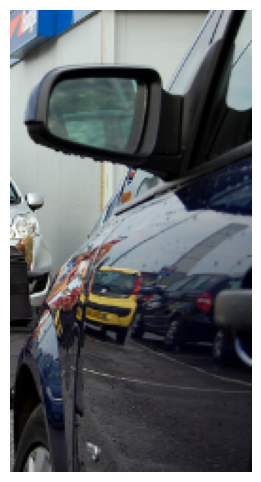

In [42]:
# Select one random sample from the filtered images
id = random.randint(0, len(car_imgs['id']) - 1)
random_img = car_imgs['id'][id]
random_img_bbox = car_imgs['bbox'][id]

# Load and display the image with bounding boxes
img_info = coco.loadImgs(random_img)[0]
img_path = os.path.join(imgDir, img_info['file_name'])
image = cv2.imread(img_path)
plt1, ax1 = plt.subplots(1, 1, figsize=(6, 6))
x, y, w, h = random_img_bbox
bb_img = cv2.rectangle(image.copy(), (int(x), int(y)), (int(x + w), int(y + h)), (0, 0, 255), 2)
ax1.imshow(cv2.cvtColor(bb_img, cv2.COLOR_BGR2RGB))
ax1.axis('off')

plt2, ax2 = plt.subplots(1, 1, figsize=(6, 6))
sub_img = image[int(y):int(y + h), int(x):int(x + w)]
sub_img = cv2.resize(sub_img, (min_size, (min_size * sub_img.shape[0]) // sub_img.shape[1]))
ax2.imshow(cv2.cvtColor(sub_img, cv2.COLOR_BGR2RGB))
ax2.axis('off')
print(sub_img.shape)

In [45]:
# Save the images
from tqdm import tqdm

os.makedirs(os.path.join(save_path, "person"), exist_ok=True)
os.makedirs(os.path.join(save_path, "car"), exist_ok=True)
pbar = tqdm(total = len(person_imgs['id']))
for img, bbox in zip(person_imgs['id'], person_imgs['bbox']):
    img_info = coco.loadImgs(img)[0]
    img_path = os.path.join(imgDir, img_info['file_name'])
    image = cv2.imread(img_path)
    x, y, w, h = bbox
    sub_img = image[int(y):int(y + h), int(x):int(x + w)]
    sub_img = cv2.resize(sub_img, (min_size, (min_size * sub_img.shape[0]) // sub_img.shape[1]))
    cv2.imwrite(os.path.join(save_path, "person", img_info['file_name']), sub_img)
    pbar.update(1)
pbar.close()

pbar = tqdm(total = len(car_imgs['id']))
for img, bbox in zip(car_imgs['id'], car_imgs['bbox']):
    img_info = coco.loadImgs(img)[0]
    img_path = os.path.join(imgDir, img_info['file_name'])
    image = cv2.imread(img_path)
    x, y, w, h = bbox
    sub_img = image[int(y):int(y + h), int(x):int(x + w)]
    sub_img = cv2.resize(sub_img, (min_size, (min_size * sub_img.shape[0]) // sub_img.shape[1]))
    cv2.imwrite(os.path.join(save_path, "car", img_info['file_name']), sub_img)
    pbar.update(1)
pbar.close()

100%|██████████| 70/70 [00:00<00:00, 119.93it/s]
